<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [126]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [127]:
import pandas as pd
url = "/Users/israel/PycharmProjects/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv"
shops = pd.read_csv(url)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [128]:
# clearing dates from reviews
def clean_reviews(df):
    def split(df): 
        return [char for char in df] 
    df = split(df)
    for indx, char in enumerate(df):
        if char.isupper():
            df = df[indx:]
            break
    return ('').join(df)
shops['full_review_text'] = shops['full_review_text'].apply(clean_reviews)

In [129]:
# make star_rating and int for easier filtering 
def clean_stars(df):
    return int(df[1])
shops['star_rating'] = shops['star_rating'].apply(clean_stars)

In [130]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [138]:
# Extending stop words
Stop_Words = nlp.Defaults.stop_words.union([' ', 'coffee', 'got', '$', 'drinks', 'drink'])

In [132]:
# Tokenizer Pipe
tokens = []
for doc in nlp.pipe(shops['full_review_text']):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in Stop_Words) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [133]:
# function to create rank columns
def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)
        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))
        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')
        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        return wc.sort_values(by='rank')

In [134]:
# filtering to create dataframes separating good shops from bad shops
good_shops = shops[shops['star_rating'] >= 4]
bad_shops = shops[shops['star_rating'] < 4]

In [135]:
# using count function
wc_good = count(good_shops['tokens'])
wc_bad = count(bad_shops['tokens'])

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


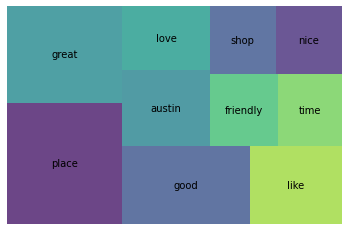

In [147]:
wc_top20_good = wc_good[wc_good['rank'] <= 10]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

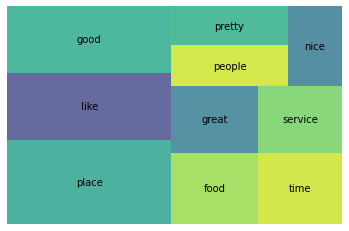

In [148]:
wc_top20_bad = wc_bad[wc_bad['rank'] <= 10]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

